# IBM Machine Learning
## Course 5: Deep Learning
## Topic: CIFAR-10 Data

### 1. Introduction
We will work ont he famouse CIFAR-10 dataset, which consists of 60000 32x32 color images. The dataset can be split into 50k training image and 10k validation images.  
The objective is to classify the images to 10 different classes.
The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

### 2. Explorative Data Analysis

#### 2.1 CIFAR data

In [45]:
## load the data 
from keras.datasets import cifar10
import numpy as np

import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import warnings

warnings.filterwarnings('ignore')


In [46]:
# class list
class_list=['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [47]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [48]:
## the size of training and test set
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [49]:
## randomly select one image from training set
selected=np.random.randint(50000)

print("The image selected is: ", selected)

The image selected is:  8486


In [50]:
int(y_train[selected])

1

automobile


(-0.5, 31.5, 31.5, -0.5)

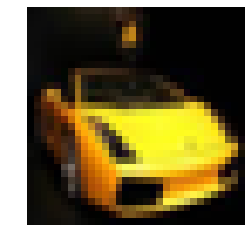

In [51]:
## Let's look at one of the images

print(class_list[int(y_train[selected])])
plt.imshow(x_train[selected])
plt.axis('off')

#### 2.2 Data preprocess

In [52]:
# Let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [53]:
# The distribution of class in test set
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### 3. Build Model

#### 3.1 Get a baseline performance using Random Forest

In [54]:
## flatten our data
x_train_flat=x_train.reshape(len(x_train), -1)
x_test_flat=x_test.reshape(len(x_test), -1)

In [55]:
## the size of training 
print('x_train_flat shape:', x_train_flat.shape)

x_train_flat shape: (50000, 3072)


In [56]:
## the size of testing
print('x_test_flat shape:', x_test_flat.shape)

x_test_flat shape: (10000, 3072)


In [57]:
import datetime
#used to help some of the timing functions
now = datetime.datetime.now

In [58]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Train the RF Model
t = now()
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(x_train_flat, y_train)
print('Training time: %s' % (now() - t))

Training time: 0:06:34.270555


In [59]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(x_test_flat)
y_pred_prob_rf = rf_model.predict_proba(x_test_flat)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))

accuracy is 0.485


In [60]:
confusion_matrix(y_test,y_pred_class_rf)

array([[570,  38,  52,  21,  36,  18,  26,  22, 160,  57],
       [ 29, 546,  16,  33,  15,  28,  43,  28,  62, 200],
       [ 90,  45, 349,  72, 142,  67, 124,  50,  33,  28],
       [ 50,  43,  68, 289,  71, 183, 144,  57,  22,  73],
       [ 58,  15, 143,  58, 400,  47, 155,  80,  21,  23],
       [ 26,  26,  83, 141,  83, 414,  86,  82,  28,  31],
       [ 11,  38,  70,  73,  92,  54, 597,  21,   5,  39],
       [ 43,  36,  43,  59, 102,  73,  46, 479,  23,  96],
       [ 87,  87,  17,  28,  19,  33,   9,  22, 628,  70],
       [ 39, 153,  20,  33,  18,  24,  24,  36,  78, 575]], dtype=int64)

As we can see above, the training time is long and the accuracy is quite low(less than 50%)

#### 3.2 Build a full connected neural network

In [61]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [62]:
model_1=Sequential()
model_1.add(Dense(100,input_shape=(3072,), activation='sigmoid'))
model_1.add(Dense(10,activation='softmax'))

In [63]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [74]:
t = now()

# Compile the model with Optimizer, Loss Function and Metrics
opt_1 = keras.optimizers.RMSprop(lr=0.0005)

model_1.compile(optimizer=opt_1, loss="categorical_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(x_train_flat, y_train, validation_data=(x_test_flat, y_test), epochs=200)

print('Training time: %s' % (now() - t))

Epoch 1/200
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7753 - accuracy: 0.3732 - val_loss: 1.8364 - val_accuracy: 0.3599
Epoch 2/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7714 - accuracy: 0.3757 - val_loss: 1.8374 - val_accuracy: 0.3595
Epoch 3/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7708 - accuracy: 0.3762 - val_loss: 1.8450 - val_accuracy: 0.3596
Epoch 4/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7662 - accuracy: 0.3793 - val_loss: 1.8249 - val_accuracy: 0.3642
Epoch 5/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7632 - accuracy: 0.3775 - val_loss: 1.8341 - val_accuracy: 0.3648
Epoch 6/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7604 - accuracy: 0.3805 - val_loss: 1.8345 - val_accuracy: 0.3594
Epoch 7/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7570 - accuracy: 0.3825 - val_loss: 1.8225 - val_ac

1563/1563 [==============================] - 6s 4ms/step - loss: 1.6239 - accuracy: 0.4379 - val_loss: 1.7495 - val_accuracy: 0.4101
Epoch 58/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6228 - accuracy: 0.4383 - val_loss: 1.7484 - val_accuracy: 0.4051
Epoch 59/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6220 - accuracy: 0.4389 - val_loss: 1.7505 - val_accuracy: 0.4049
Epoch 60/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6183 - accuracy: 0.4392 - val_loss: 1.7400 - val_accuracy: 0.4093
Epoch 61/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6174 - accuracy: 0.4405 - val_loss: 1.7462 - val_accuracy: 0.4098
Epoch 62/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6149 - accuracy: 0.4415 - val_loss: 1.7469 - val_accuracy: 0.4059
Epoch 63/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6140 - accuracy: 0.4415 - val_loss: 1.7463 - val_accuracy

1563/1563 [==============================] - 6s 4ms/step - loss: 1.5590 - accuracy: 0.4569 - val_loss: 1.7451 - val_accuracy: 0.4081
Epoch 114/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5584 - accuracy: 0.4579 - val_loss: 1.7352 - val_accuracy: 0.4071
Epoch 115/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5570 - accuracy: 0.4587 - val_loss: 1.7414 - val_accuracy: 0.4120
Epoch 116/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5571 - accuracy: 0.4567 - val_loss: 1.7536 - val_accuracy: 0.4079
Epoch 117/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5564 - accuracy: 0.4566 - val_loss: 1.7513 - val_accuracy: 0.4054
Epoch 118/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5529 - accuracy: 0.4589 - val_loss: 1.7357 - val_accuracy: 0.4167
Epoch 119/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5546 - accuracy: 0.4567 - val_loss: 1.7779 - val_ac

Epoch 169/200
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5181 - accuracy: 0.4694 - val_loss: 1.7541 - val_accuracy: 0.4132
Epoch 170/200
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5175 - accuracy: 0.4683 - val_loss: 1.7457 - val_accuracy: 0.4151
Epoch 171/200
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5174 - accuracy: 0.4699 - val_loss: 1.7496 - val_accuracy: 0.4116
Epoch 172/200
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5172 - accuracy: 0.4703 - val_loss: 1.7905 - val_accuracy: 0.4140
Epoch 173/200
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5141 - accuracy: 0.4706 - val_loss: 1.7446 - val_accuracy: 0.4165
Epoch 174/200
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5139 - accuracy: 0.4713 - val_loss: 1.7878 - val_accuracy: 0.4068
Epoch 175/200
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5136 - accuracy: 0.4712 - val_loss: 1

In [77]:
score = model_1.evaluate(x_test_flat, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.783251166343689
Test accuracy: 0.4138999879360199


The full connection neural network perform slightly better than random forest. The accuray is similar to random forest. We can increase the hidden layers and number of epochs, however the time will increase too.

#### 3.3 Convolutional Neural Network

In [65]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [66]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [67]:
batch_size = 32

# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [68]:
t = now()
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)
print('Training time: %s' % (now() - t))

Epoch 1/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.5786 - accuracy: 0.4241 - val_loss: 1.2191 - val_accuracy: 0.5587
Epoch 2/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.1826 - accuracy: 0.5803 - val_loss: 1.1232 - val_accuracy: 0.6035
Epoch 3/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.0084 - accuracy: 0.6490 - val_loss: 0.8676 - val_accuracy: 0.6975
Epoch 4/10
1563/1563 [==============================] - 121s 78ms/step - loss: 0.9088 - accuracy: 0.6838 - val_loss: 0.8868 - val_accuracy: 0.7032
Epoch 5/10
1563/1563 [==============================] - 121s 78ms/step - loss: 0.8552 - accuracy: 0.7069 - val_loss: 0.8810 - val_accuracy: 0.6986
Epoch 6/10
1563/1563 [==============================] - 121s 78ms/step - loss: 0.8237 - accuracy: 0.7176 - val_loss: 0.8932 - val_accuracy: 0.7008
Epoch 7/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.8139 - accuracy: 0.7250 - val_loss: 0

In [78]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.9243311285972595
Test accuracy: 0.73089998960495


### 4. Conclusion

In this course, we learn different deep learning architecture. They are suitable for different task. Convolutional Neural network is very good in image classfication tasks. Each pixel can be treated as one feature. The relative location and value of each pixel is very important for image.  